# Vanilla Decision Tree

In [18]:
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

In [5]:
X, y = load_breast_cancer(return_X_y=True)

In [33]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
clf = tree.DecisionTreeClassifier()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

426 143 426 143


In [12]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.6323529411764706, 0.9375, 'x[20] <= 16.745\ngini = 0.471\nsamples = 426\nvalue = [162, 264]'),
 Text(0.5, 0.8125, 'x[27] <= 0.16\ngini = 0.141\nsamples = 276\nvalue = [21, 255]'),
 Text(0.4411764705882353, 0.6875, 'x[27] <= 0.136\ngini = 0.066\nsamples = 264\nvalue = [9, 255]'),
 Text(0.23529411764705882, 0.5625, 'x[29] <= 0.057\ngini = 0.032\nsamples = 247\nvalue = [4, 243]'),
 Text(0.17647058823529413, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.29411764705882354, 0.4375, 'x[13] <= 38.35\ngini = 0.024\nsamples = 246\nvalue = [3, 243]'),
 Text(0.17647058823529413, 0.3125, 'x[14] <= 0.003\ngini = 0.008\nsamples = 235\nvalue = [1, 234]'),
 Text(0.11764705882352941, 0.1875, 'x[14] <= 0.003\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.058823529411764705, 0.0625, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.17647058823529413, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.23529411764705882, 0.1875, 'gini = 0.0\nsamples = 229\nvalue = [0,

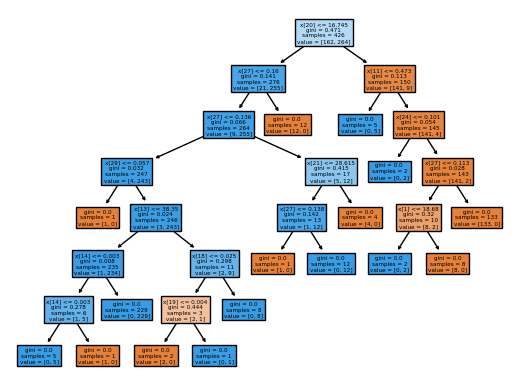

In [15]:
tree.plot_tree(clf, filled=True)

In [16]:
clf.score(X_test, y_test)

0.8951048951048951

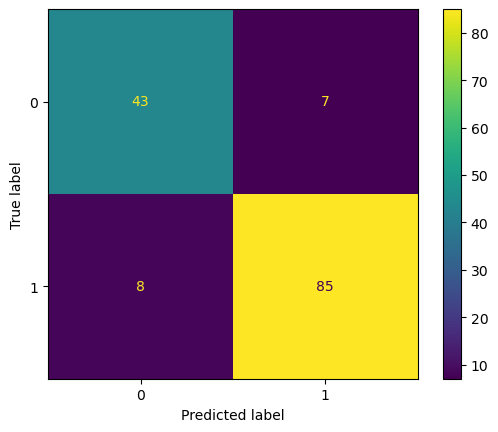

In [19]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

---

# Genetic Decision Tree

In [208]:
import operator
import numpy
from deap import gp
from deap import creator
from deap import base
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt
import random
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize

In [209]:
X.shape

(569, 30)

In [210]:
[type(x) for x in X[0]]

[numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64]

In [211]:
X = normalize(X)

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [213]:
pset = gp.PrimitiveSetTyped("main", [type(x) for x in X_train[0]], bool, "IN")

In [214]:
# boolean operators
pset.addPrimitive(operator.and_, [bool, bool], bool)
pset.addPrimitive(operator.or_, [bool, bool], bool)
pset.addPrimitive(operator.not_, [bool], bool)

# numpy.float64ing point operators
# Define a protected division function
def protectedDiv(left, right):
    try: return left / right
    except ZeroDivisionError: return 1

pset.addPrimitive(operator.add, [numpy.float64,numpy.float64], numpy.float64)
pset.addPrimitive(operator.sub, [numpy.float64,numpy.float64], numpy.float64)
pset.addPrimitive(operator.mul, [numpy.float64,numpy.float64], numpy.float64)
pset.addPrimitive(protectedDiv, [numpy.float64,numpy.float64], numpy.float64)

# logic operators
# Define a new if-then-else function
def if_then_else(input, output1, output2):
    if input: return output1
    else: return output2

pset.addPrimitive(operator.lt, [numpy.float64, numpy.float64], bool)
pset.addPrimitive(operator.eq, [numpy.float64, numpy.float64], bool)
pset.addPrimitive(if_then_else, [bool, numpy.float64, numpy.float64], numpy.float64)

# terminals
pset.addEphemeralConstant("rand_norm", lambda: numpy.float64(random.random()), numpy.float64)
pset.addTerminal(False, bool)
pset.addTerminal(True, bool)

/Users/deebakkarthi/.local/share/conda/envs/deap_testing/lib/python3.12/site-packages/deap/gp.py:254: RuntimeWarning: Ephemeral rand_norm function cannot be pickled because its generating function is a lambda function. Use functools.partial instead.
  warnings.warn("Ephemeral {name} function cannot be "


In [215]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=5)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

/Users/deebakkarthi/.local/share/conda/envs/deap_testing/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/deebakkarthi/.local/share/conda/envs/deap_testing/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [216]:
def eval_breast_cancer(individulal):
    func = toolbox.compile(expr=individulal)
    y_pred = [func(*data) for data in X_train]
    return accuracy_score(y_train, y_pred),

In [217]:
toolbox.register("evaluate", eval_breast_cancer)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

In [218]:
pop = toolbox.population(n=100)

In [219]:
hof = tools.HallOfFame(1)

In [220]:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

In [221]:
algorithms.eaSimple(pop, toolbox, 0.5, 0.2, 40, stats, halloffame=hof)

/var/folders/z9/204byscd3zd4t17t3b7r171m0000gn/T/ipykernel_5273/1328653110.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  try: return left / right
/var/folders/z9/204byscd3zd4t17t3b7r171m0000gn/T/ipykernel_5273/1328653110.py:9: RuntimeWarning: invalid value encountered in scalar divide
  try: return left / right
/var/folders/z9/204byscd3zd4t17t3b7r171m0000gn/T/ipykernel_5273/1328653110.py:9: RuntimeWarning: invalid value encountered in scalar divide
  try: return left / right
/var/folders/z9/204byscd3zd4t17t3b7r171m0000gn/T/ipykernel_5273/1328653110.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  try: return left / right
/var/folders/z9/204byscd3zd4t17t3b7r171m0000gn/T/ipykernel_5273/1328653110.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  try: return left / right
/var/folders/z9/204byscd3zd4t17t3b7r171m0000gn/T/ipykernel_5273/1328653110.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  try: return left / 

gen	nevals	avg     	std      	min    	max     
0  	100   	0.483756	0.0990197	0.34507	0.600939
1  	56    	0.55277 	0.0881226	0.399061	0.767606
2  	71    	0.574413	0.0745825	0.399061	0.767606


/var/folders/z9/204byscd3zd4t17t3b7r171m0000gn/T/ipykernel_5273/1328653110.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  try: return left / right
/var/folders/z9/204byscd3zd4t17t3b7r171m0000gn/T/ipykernel_5273/1328653110.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  try: return left / right


3  	58    	0.577934	0.0730224	0.361502	0.767606
4  	60    	0.580282	0.0764963	0.399061	0.767606
5  	62    	0.594812	0.0711131	0.399061	0.767606


/var/folders/z9/204byscd3zd4t17t3b7r171m0000gn/T/ipykernel_5273/1328653110.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  try: return left / right
/var/folders/z9/204byscd3zd4t17t3b7r171m0000gn/T/ipykernel_5273/1328653110.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  try: return left / right
/var/folders/z9/204byscd3zd4t17t3b7r171m0000gn/T/ipykernel_5273/1328653110.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  try: return left / right
/var/folders/z9/204byscd3zd4t17t3b7r171m0000gn/T/ipykernel_5273/1328653110.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  try: return left / right
/var/folders/z9/204byscd3zd4t17t3b7r171m0000gn/T/ipykernel_5273/1328653110.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  try: return left / right
/var/folders/z9/204byscd3zd4t17t3b7r171m0000gn/T/ipykernel_5273/1328653110.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  try: return left 

6  	59    	0.605892	0.0739663	0.399061	0.767606
7  	69    	0.612559	0.074146 	0.377934	0.767606
8  	66    	0.616831	0.0826963	0.361502	0.767606
9  	58    	0.611549	0.102456 	0.232394	0.767606
10 	60    	0.605329	0.114316 	0.399061	0.767606


/var/folders/z9/204byscd3zd4t17t3b7r171m0000gn/T/ipykernel_5273/1328653110.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  try: return left / right
/var/folders/z9/204byscd3zd4t17t3b7r171m0000gn/T/ipykernel_5273/1328653110.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  try: return left / right
/var/folders/z9/204byscd3zd4t17t3b7r171m0000gn/T/ipykernel_5273/1328653110.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  try: return left / right
/var/folders/z9/204byscd3zd4t17t3b7r171m0000gn/T/ipykernel_5273/1328653110.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  try: return left / right
/var/folders/z9/204byscd3zd4t17t3b7r171m0000gn/T/ipykernel_5273/1328653110.py:9: RuntimeWarning: invalid value encountered in scalar divide
  try: return left / right
/var/folders/z9/204byscd3zd4t17t3b7r171m0000gn/T/ipykernel_5273/1328653110.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  try: return left /

11 	59    	0.641362	0.0997681	0.394366	0.767606
12 	64    	0.640962	0.127801 	0.293427	0.767606
13 	59    	0.681502	0.109407 	0.396714	0.767606
14 	54    	0.700399	0.109778 	0.399061	0.767606
15 	67    	0.692793	0.121526 	0.399061	0.767606
16 	63    	0.696432	0.120767 	0.330986	0.767606


/var/folders/z9/204byscd3zd4t17t3b7r171m0000gn/T/ipykernel_5273/1328653110.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  try: return left / right
/var/folders/z9/204byscd3zd4t17t3b7r171m0000gn/T/ipykernel_5273/1328653110.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  try: return left / right
/var/folders/z9/204byscd3zd4t17t3b7r171m0000gn/T/ipykernel_5273/1328653110.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  try: return left / right
/var/folders/z9/204byscd3zd4t17t3b7r171m0000gn/T/ipykernel_5273/1328653110.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  try: return left / right


17 	57    	0.693592	0.116186 	0.399061	0.767606
18 	46    	0.692394	0.119716 	0.396714	0.767606
19 	52    	0.687606	0.126197 	0.359155	0.767606


/var/folders/z9/204byscd3zd4t17t3b7r171m0000gn/T/ipykernel_5273/1328653110.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  try: return left / right


20 	78    	0.686174	0.131467 	0.399061	0.767606
21 	51    	0.711995	0.108374 	0.399061	0.767606
22 	71    	0.671338	0.132434 	0.330986	0.767606
23 	66    	0.693685	0.107024 	0.399061	0.795775
24 	60    	0.692981	0.113567 	0.399061	0.830986
25 	58    	0.685869	0.125258 	0.399061	0.767606


/var/folders/z9/204byscd3zd4t17t3b7r171m0000gn/T/ipykernel_5273/1328653110.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  try: return left / right
/var/folders/z9/204byscd3zd4t17t3b7r171m0000gn/T/ipykernel_5273/1328653110.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  try: return left / right
/var/folders/z9/204byscd3zd4t17t3b7r171m0000gn/T/ipykernel_5273/1328653110.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  try: return left / right
/var/folders/z9/204byscd3zd4t17t3b7r171m0000gn/T/ipykernel_5273/1328653110.py:9: RuntimeWarning: invalid value encountered in scalar divide
  try: return left / right


26 	59    	0.703474	0.0979337	0.399061	0.767606
27 	49    	0.698545	0.132059 	0.396714	0.866197
28 	56    	0.709061	0.123645 	0.399061	0.866197
29 	65    	0.717981	0.124927 	0.399061	0.866197
30 	73    	0.712817	0.151298 	0.183099	0.866197
31 	56    	0.714484	0.166987 	0.183099	0.866197


/var/folders/z9/204byscd3zd4t17t3b7r171m0000gn/T/ipykernel_5273/1328653110.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  try: return left / right
/var/folders/z9/204byscd3zd4t17t3b7r171m0000gn/T/ipykernel_5273/1328653110.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  try: return left / right


32 	62    	0.744953	0.145962 	0.234742	0.866197
33 	52    	0.731596	0.165428 	0.183099	0.870892
34 	64    	0.736573	0.167637 	0.293427	0.870892


/var/folders/z9/204byscd3zd4t17t3b7r171m0000gn/T/ipykernel_5273/1328653110.py:9: RuntimeWarning: invalid value encountered in scalar divide
  try: return left / right


35 	63    	0.760798	0.159154 	0.396714	0.877934
36 	62    	0.745188	0.180629 	0.309859	0.877934
37 	57    	0.775563	0.149481 	0.394366	0.877934


/var/folders/z9/204byscd3zd4t17t3b7r171m0000gn/T/ipykernel_5273/1328653110.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  try: return left / right


38 	66    	0.76838 	0.173766 	0.171362	0.875587
39 	55    	0.773122	0.167108 	0.394366	0.875587
40 	51    	0.801831	0.154197 	0.133803	0.875587


([[<deap.gp.Primitive at 0x13c66fa60>,
  [<deap.gp.Primitive at 0x13c66fa60>, <deap.gp.Terminal at 0x13c14ecc0>],
 [{'gen': 0,
   'nevals': 100,
   'avg': 0.4837558685446009,
   'std': 0.09901968297927334,
   'min': 0.34507042253521125,
   'max': 0.6009389671361502},
  {'gen': 1,
   'nevals': 56,
   'avg': 0.5527699530516432,
   'std': 0.08812262850588554,
   'min': 0.39906103286384975,
   'max': 0.7676056338028169},
  {'gen': 2,
   'nevals': 71,
   'avg': 0.5744131455399061,
   'std': 0.07458252963068861,
   'min': 0.39906103286384975,
   'max': 0.7676056338028169},
  {'gen': 3,
   'nevals': 58,
   'avg': 0.5779342723004695,
   'std': 0.0730224304045956,
   'min': 0.3615023474178404,
   'max': 0.7676056338028169},
  {'gen': 4,
   'nevals': 60,
   'avg': 0.5802816901408451,
   'std': 0.07649629315957726,
   'min': 0.39906103286384975,
   'max': 0.7676056338028169},
  {'gen': 5,
   'nevals': 62,
   'avg': 0.5948122065727699,
   'std': 0.0711131202154798,
   'min': 0.39906103286384975,
 

In [222]:
gp.graph(hof[0])

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [(0, 1), (1, 2), (2, 3), (3, 4), (3, 5), (2, 6), (2, 7), (1, 8)],
 {0: 'not_',
  1: 'lt',
  2: 'if_then_else',
  3: 'lt',
  4: 'IN4',
  5: 'IN27',
  6: 'IN29',
  7: 'IN4',
  8: 'IN6'})

In [223]:
import pygraphviz as pgv

In [224]:
nodes, edges, labels = gp.graph(hof[0])
g = pgv.AGraph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)
g.layout(prog="dot")

for i in nodes:
    n = g.get_node(i)
    n.attr["label"] = labels[i]

g.draw("tree.pdf")

In [225]:
eval_breast_cancer(hof[0])

(0.8779342723004695,)

In [226]:
def test_breast_cancer(individulal):
    func = toolbox.compile(expr=individulal)
    y_pred = [func(*data) for data in X_test]
    return accuracy_score(y_test, y_pred),

In [227]:
test_breast_cancer(hof[0])

(0.9090909090909091,)